In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0, 999, 1000).cuda()

In [3]:
y = torch.sin((x * 2 * 3.14) / 50).cuda()

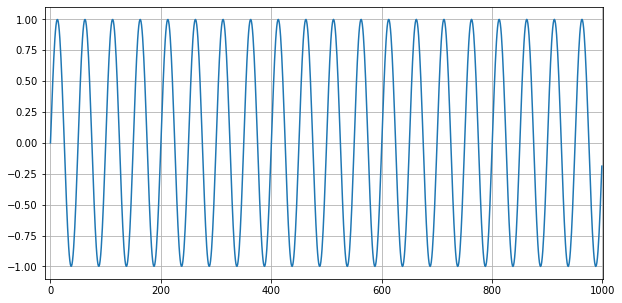

In [4]:
plt.figure(figsize=(10, 5))
plt.xlim(-10, 1001)
plt.grid(True)
plt.plot(y.cpu().numpy())
plt.show()

In [5]:
test_size = 100
train_set = y[:-test_size]
test_set = y[-test_size:]

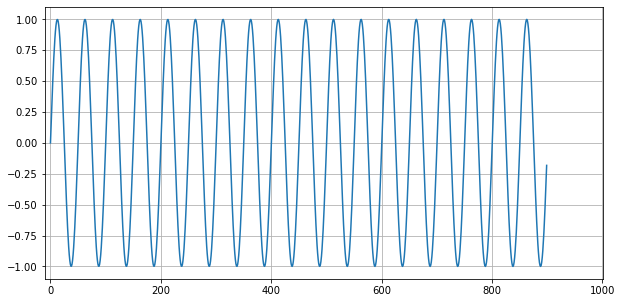

In [6]:
plt.figure(figsize=(10, 5))
plt.xlim(-10, 1001)
plt.grid(True)
plt.plot(train_set.cpu().numpy())
plt.show()

In [7]:
def prepare_timeseries(series, window_size):
    L = len(series)
    ts = []
    
    for i in range(L - window_size):
        window = series[i : i+window_size].cuda()
        label = series[i+window_size : i+window_size+1].cuda()
        ts.append((window, label))
        
    return ts

In [8]:
train_data = prepare_timeseries(train_set, window_size=100)

In [9]:
class LSTM(nn.Module):
    def __init__(self, input_features=1, hidden_size=32, output_features=1):
        super().__init__()
        self.input_features = input_features
        self.hidden_size = hidden_size
        self.output_features = output_features
        
        self.lstm = nn.LSTM(self.input_features, self.hidden_size)
        
        self.fc1 = nn.Linear(self.hidden_size, self.output_features)
        
        self.hidden = (torch.zeros(1,1, self.hidden_size).cuda(), torch.zeros(1,1, self.hidden_size).cuda())
    
    def forward(self, series):
        out, self.hidden = self.lstm(series.view(len(series), 1, -1), self.hidden)
        
        out = self.fc1(out.view(len(series), -1))
        
        return out[-1]

In [10]:
model = LSTM(input_features=1, hidden_size=32, output_features=1).cuda()
criterion = nn.SmoothL1Loss().cuda()
optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
epochs = 10
forecast = 100

Epoch 1
Loss: 0.0000
Validation Loss: 0.2655


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


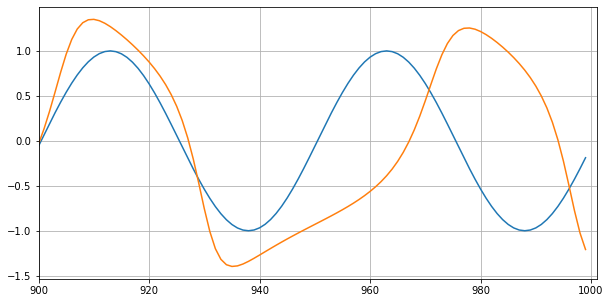

Epoch 2
Loss: 0.0000
Validation Loss: 0.2637


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


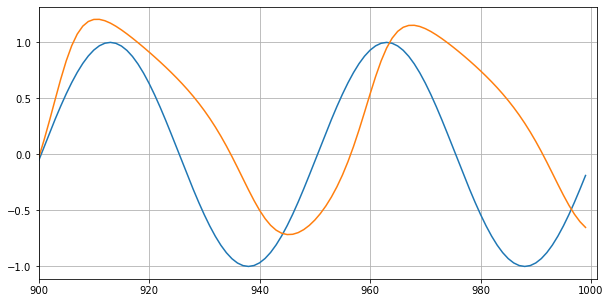

Epoch 3
Loss: 0.0000
Validation Loss: 0.2651


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


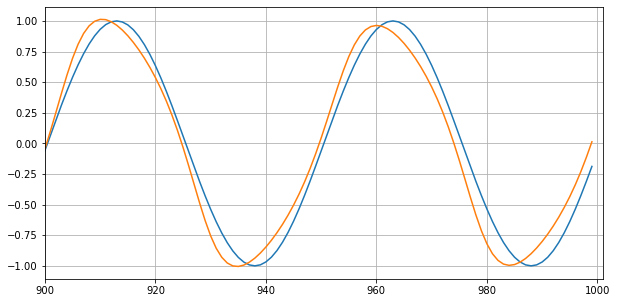

Epoch 4
Loss: 0.0000
Validation Loss: 0.2648


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


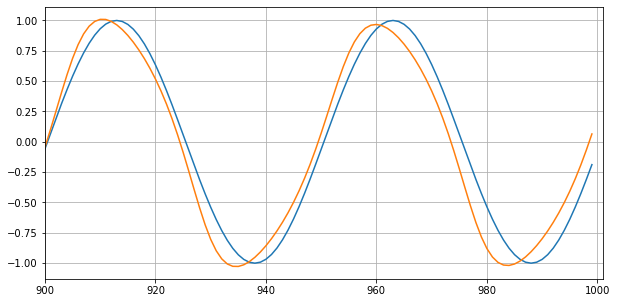

Epoch 5
Loss: 0.0000
Validation Loss: 0.2645


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


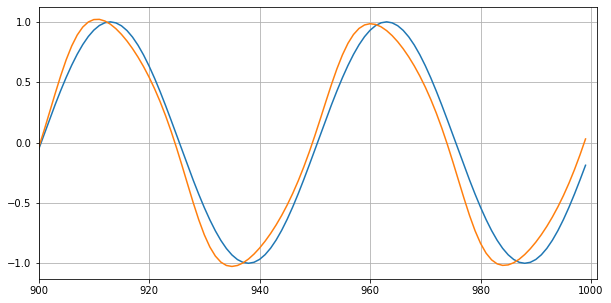

Epoch 6
Loss: 0.0000
Validation Loss: 0.2644


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


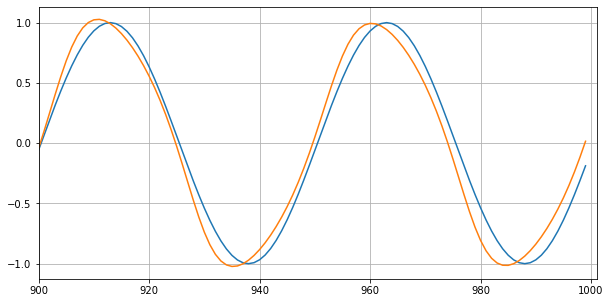

Epoch 7
Loss: 0.0000
Validation Loss: 0.2644


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


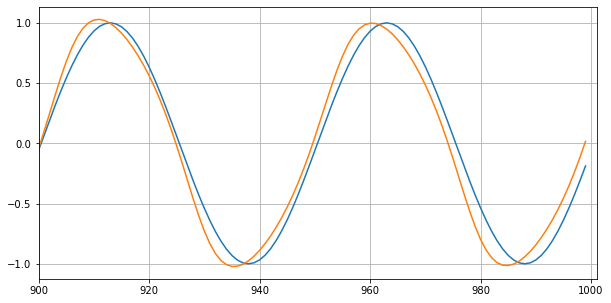

Epoch 8
Loss: 0.0000
Validation Loss: 0.2644


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


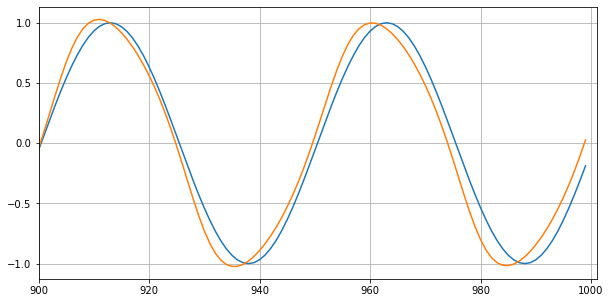

Epoch 9
Loss: 0.0000
Validation Loss: 0.2644


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


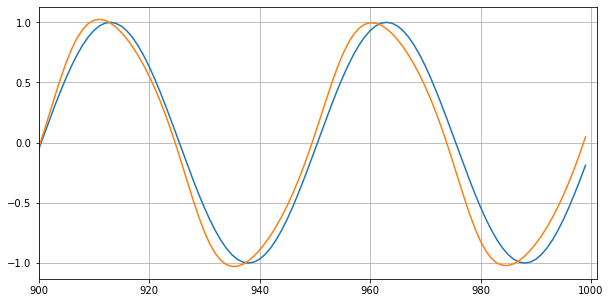

Epoch 10
Loss: 0.0000
Validation Loss: 0.2644


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files\python37\lib\site-packages\torch\nn\modules\loss.py:782: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


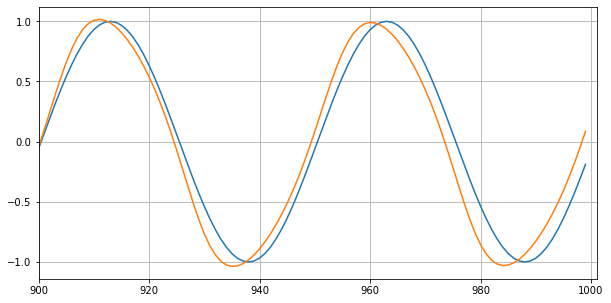

In [11]:
for i in range(epochs):
    for series, labels in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size).cuda(), torch.zeros(1, 1, model.hidden_size).cuda())
        
        pred = model(series)
        loss = criterion(pred, labels)
        
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {i+1}\nLoss: {loss.item():.4f}")
    
    preds = train_set[-100:].tolist()
    
    for f in range(forecast):
        seq = torch.FloatTensor(preds[-50:]).cuda()
        
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size).cuda(), torch.zeros(1, 1, model.hidden_size).cuda())
            preds.append(model(seq).item())
            
    val_loss = criterion(torch.tensor(pred[-100:]), y[900:])
    
    print(f"Validation Loss: {val_loss.item():.4f}")
    
    plt.figure(figsize=(10, 5))
    plt.xlim(900, 1001)
    plt.grid(True)
    plt.plot(y.cpu().numpy())
    plt.plot(range(900, 1000), preds[-100:])
    plt.show()

In [12]:
epochs = 30
window_size = 100
future = 100

data = prepare_timeseries(y, window_size=100)

In [13]:
import time

start_time = time.time()

for i in range(epochs):
    for series, labels in data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size).cuda(), torch.zeros(1, 1, model.hidden_size).cuda())
        
        pred = model(series)
        loss = criterion(pred, labels)
        
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {i+1}\nLoss: {loss.item():.4f}")
    
end_time = time.time() - start_time

print(f"Training Duration {end_time/60} minutes")

Epoch 1
Loss: 0.0000
Epoch 2
Loss: 0.0000
Epoch 3
Loss: 0.0000
Epoch 4
Loss: 0.0000
Epoch 5
Loss: 0.0001
Epoch 6
Loss: 0.0024
Epoch 7
Loss: 0.0001
Epoch 8
Loss: 0.0004
Epoch 9
Loss: 0.0001
Epoch 10
Loss: 0.0000
Epoch 11
Loss: 0.0000
Epoch 12
Loss: 0.0000
Epoch 13
Loss: 0.0000
Epoch 14
Loss: 0.0000
Epoch 15
Loss: 0.0000
Epoch 16
Loss: 0.0000
Epoch 17
Loss: 0.0000
Epoch 18
Loss: 0.0000
Epoch 19
Loss: 0.0000
Epoch 20
Loss: 0.0000
Epoch 21
Loss: 0.0004
Epoch 22
Loss: 0.0001
Epoch 23
Loss: 0.0008
Epoch 24
Loss: 0.0001
Epoch 25
Loss: 0.0005
Epoch 26
Loss: 0.0000
Epoch 27
Loss: 0.0000
Epoch 28
Loss: 0.0000
Epoch 29
Loss: 0.0001
Epoch 30
Loss: 0.0000
Training Duration 1.9804898222287497 minutes


In [14]:
preds = y[-window_size:].tolist()

for i in range(forecast):
    seq = torch.FloatTensor(preds[-window_size:]).cuda()
    
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_size).cuda(), torch.zeros(1, 1, model.hidden_size).cuda())
        preds.append(model(seq).item())

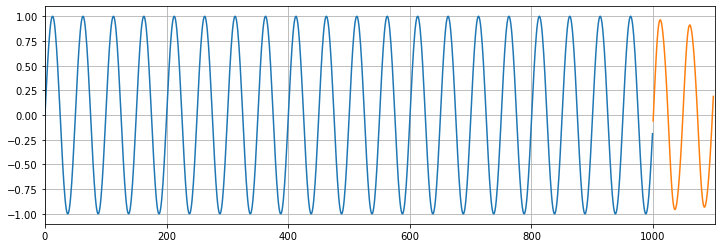

In [17]:
plt.figure(figsize=(12, 4))
plt.xlim(0, 1101)
plt.grid(True)
plt.plot(y.cpu().numpy())
plt.plot(range(1000, 1000+100), preds[window_size:])
plt.show()